## Wczytanie potrzebnych bibliotek

In [1]:
import pandas as pd
import numpy as np
import os, re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display

Automatyczne wyszukiwanie dysku przenośnego potrzbenego do ścieżki do pliku z danymi

In [2]:
discks_names =  re.findall(r"[A-Z]+:.*$",os.popen("mountvol /").read(),re.MULTILINE)

a = []
for i in range(len(discks_names)):
    b = discks_names[i].split(":")[0]
    a.append(b)

dics = a['C' in a]

dics

'D'

In [3]:
#chamionship
league_abb = 'E1'

## Wczytanie oraz prezentacja zbioru danych

In [4]:
pd.options.display.max_columns = None
loc = dics + ":/data_football/final_datasets/"
file = "laliga_final_log"
dataset = pd.read_csv(loc + 'training_dataset_'+league_abb+'.csv', index_col = 0)
dataset.tail()

,HomeTeam,AwayTeam,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HT_Wins,AT_Wins,HT_Loss,AT_Loss,HT_Draws,AT_Draws,MW,HomeTeamLP,AwayTeamLP,Sezon,HT_LP,AT_LP,HTFormPts,ATFormPts,HTWinStreak5,HTWinStreak3,HTWinStreak5.1,HTLossStreak3,HTLossStreak5,HTDrawStreak3,HTDrawStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,ATDrawStreak3,ATDrawStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,H2H_Home_pts,H2H_Away_pts,Off_A,Deff_H,Deff_A,Mean_home_goals,Mean_away_goals,Elo_HT,Elo_AT,Club_x,Age_H,Foreign_H,Total_value_H,Market_value_H,Club_y,Age_A,Foreign_A,Total_value_A,Market_value_A
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-03,Sheffield United,Brentford,H,1.648649,1.621622,0.918919,1.324324,1.837838,1.324324,0.540541,0.351351,0.216216,0.351351,0.216216,0.270270,37,2.0,11.0,19,3,13,13.0,9.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.729730,0.297297,19,4.0,-9.0,7,1,1.000000,1.470588,1.000000,2.000000,1.507353,1474,1527,Sheffield United,25.8,6,44.15,1.130,Brentford,22.0,20,38.25,0.981
2019-12-03,Bolton,Sheffield Weds,A,0.611111,1.138889,1.527778,1.333333,0.722222,1.333333,0.166667,0.333333,0.583333,0.305556,0.222222,0.333333,36,23.0,12.0,19,20,12,3.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.916667,-0.194444,-22,-6.0,11.0,4,4,0.300000,1.000000,1.612903,0.806452,0.332500,1366,1480,Bolton,26.2,32,23.60,0.638,Sheffield Weds,24.8,19,62.13,1.520
2019-12-03,Reading,Leeds,A,1.081081,1.621622,1.432432,1.027027,0.972973,1.891892,0.216216,0.567568,0.432432,0.216216,0.324324,0.189189,37,20.0,3.0,19,17,2,10.0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.351351,0.594595,-34,-2.0,17.0,4,4,1.000000,0.470588,1.000000,1.600000,0.482353,1380,1517,Reading,24.2,16,64.58,1.320,Leeds,22.7,26,77.55,1.580
2019-12-03,Bristol City,Ipswich,D,1.216216,0.756757,1.027027,1.621622,1.486486,0.594595,0.405405,0.081081,0.297297,0.540541,0.270270,0.351351,37,8.0,24.0,19,6,20,2.0,4.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.189189,-0.864865,33,-2.0,-16.0,9,0,0.980392,2.352941,0.855615,1.197861,2.364475,1486,1411,Bristol City,23.7,5,42.30,1.140,Ipswich,23.8,6,22.38,0.497
2019-12-03,Blackburn,Wigan,H,1.305556,0.944444,1.527778,1.361111,1.222222,1.000000,0.305556,0.250000,0.361111,0.472222,0.305556,0.250000,36,15.0,18.0,19,14,16,1.0,4.0,0,0,0,1,0,0,0,0,0,0,0,1,0,-0.222222,-0.416667,8,-3.0,-3.0,3,6,1.000000,1.000000,1.000000,1.166667,1.108333,1391,1400,Blackburn,23.5,1,22.75,0.583,Wigan,24.3,7,26.15,0.608


Wiekszość zmiennych wykorzystanych w zbiorze danych opisanych zostało w:

https://analizadanychwpilce.com/2018/09/15/przewidywanie-wyniku-spotkania-z-wykorzystaniem-regresji-logistycznej/
oraz

https://analizadanychwpilce.com/2019/02/03/przewidywany-wynik-na-podstawie-rozkladu-poissona/

Na etapie przygotowywania zbioru danych powstało kilka wierszy, które przyjmowały kategorię pomocniczą 'M'. 
W tym momencie powinniśmy pozbyć się tych obserwaci ze zbioru zbioru danych.

## Dodanie dodatkowych zmiennych

Stworzenie zmiennej wynikowej 'FTR'

In [5]:
df_final = dataset
warnings.simplefilter('ignore')
df_final['FTR'] = np.where(df_final['FTR']=='H', 1, 0)
df_final['FTR']=(df_final['FTR']==1).astype(int)

Zmienna 'FTR' przyjmuje wartość 1 w przypadku wygranej gospodarzy, 0 w przeciwym wypadku.
Przekonwertowana została również do typu integer. 

In [6]:
df_final.columns

Index(['HomeTeam', 'AwayTeam', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP',
       'ATP', 'HT_Wins', 'AT_Wins', 'HT_Loss', 'AT_Loss', 'HT_Draws',
       'AT_Draws', 'MW', 'HomeTeamLP', 'AwayTeamLP', 'Sezon', 'HT_LP', 'AT_LP',
       'HTFormPts', 'ATFormPts', 'HTWinStreak5', 'HTWinStreak3',
       'HTWinStreak5.1', 'HTLossStreak3', 'HTLossStreak5', 'HTDrawStreak3',
       'HTDrawStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3',
       'ATLossStreak5', 'ATDrawStreak3', 'ATDrawStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts', 'DiffLP', 'H2H_Home_pts', 'H2H_Away_pts',
       'Off_A', 'Deff_H', 'Deff_A', 'Mean_home_goals', 'Mean_away_goals',
       'Elo_HT', 'Elo_AT', 'Club_x', 'Age_H', 'Foreign_H', 'Total_value_H',
       'Market_value_H', 'Club_y', 'Age_A', 'Foreign_A', 'Total_value_A',
       'Market_value_A'],
      dtype='object')

In [7]:
df_final = df_final[['FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP',
       'ATP', 'HT_Wins', 'AT_Wins', 'HT_Loss', 'AT_Loss', 'HT_Draws',
       'AT_Draws', 'MW', 'HomeTeamLP', 'AwayTeamLP', 'Sezon', 'HT_LP', 'AT_LP',
       'HTFormPts', 'ATFormPts', 'HTWinStreak5', 'HTWinStreak3',
       'HTLossStreak3', 'HTLossStreak5', 'HTDrawStreak3',
       'HTDrawStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3',
       'ATLossStreak5', 'ATDrawStreak3', 'ATDrawStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts', 'DiffLP', 'H2H_Home_pts', 'H2H_Away_pts',
        'Mean_home_goals', 'Mean_away_goals',
       'Elo_HT', 'Elo_AT',  'Age_H', 'Foreign_H', 'Total_value_H',
       'Market_value_H',  'Age_A', 'Foreign_A', 'Total_value_A',
       'Market_value_A']]

### Przegląd danych

In [8]:
df_final.describe()

,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HT_Wins,AT_Wins,HT_Loss,AT_Loss,HT_Draws,AT_Draws,MW,HomeTeamLP,AwayTeamLP,Sezon,HT_LP,AT_LP,HTFormPts,ATFormPts,HTWinStreak5,HTWinStreak3,HTLossStreak3,HTLossStreak5,HTDrawStreak3,HTDrawStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,ATDrawStreak3,ATDrawStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,H2H_Home_pts,H2H_Away_pts,Mean_home_goals,Mean_away_goals,Elo_HT,Elo_AT,Age_H,Foreign_H,Total_value_H,Market_value_H,Age_A,Foreign_A,Total_value_A,Market_value_A
count,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,4428.000000,4428.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,4428.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000
mean,0.433174,1.163250,1.173233,1.174443,1.164072,1.215283,1.234067,0.322265,0.328538,0.328928,0.322690,0.248488,0.248454,23.255370,12.516706,12.514121,15.059666,11.429395,11.516110,6.734417,6.900181,0.008950,0.048528,0.046142,0.007359,0.018099,0.000597,0.053699,0.012132,0.047932,0.006762,0.016706,0.000994,-0.011193,0.009161,-0.186754,-0.165763,0.002586,2.991846,3.230509,1.480350,1.149954,1476.431782,1476.473747,24.230430,11.010939,41.074990,1.021362,24.231862,11.008552,41.064759,1.020694
std,0.495563,0.398634,0.397550,0.398363,0.401500,0.455317,0.447252,0.151683,0.151289,0.152739,0.153014,0.119378,0.119322,13.385117,6.905420,6.907931,2.623595,6.436758,6.481258,3.143854,3.169979,0.094189,0.214901,0.209813,0.085476,0.133321,0.024422,0.225446,0.109486,0.213643,0.081962,0.128182,0.031522,0.511043,0.509447,12.948288,4.484804,9.972819,2.299214,2.349671,0.723019,0.456245,64.292068,64.320809,1.083398,6.978788,27.395434,0.686221,1.085510,6.969378,27.351617,0.683328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.200000,-2.000000,-65.000000,-15.000000,-23.000000,0.000000,0.000000,0.000000,0.000000,1319.000000,1319.000000,20.800000,1.000000,8.150000,0.209000,20.800000,1.000000,8.150000,0.209000
25%,0.000000,0.961538,0.974359,0.965517,0.958333,0.975610,1.000000,0.233333,0.242163,0.235294,0.227273,0.181818,0.181818,12.000000,7.000000,7.000000,13.000000,6.000000,6.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.333333,-0.304348,-7.000000,-3.000000,-7.000000,1.000000,1.000000,1.000000,1.016667,1432.000000,1432.000000,23.500000,6.000000,23.230000,0.559000,23.500000,6.000000,23.230000,0.559000
50%,0.000000,1.190476,1.200000,1.210526,1.200000,1.250000,1.266667,0.333333,0.333333,0.333333,0.333333,0.250000,0.250000,23.000000,13.000000,13.000000,15.000000,11.000000,11.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,1.400000,1.133333,1476.000000,1476.000000,24.100000,9.000000,33.650000,0.859000,24.100000,9.000000,33.650000,0.859000
75%,1.000000,1.413793,1.423077,1.432432,1.428571,1.500000,1.511628,0.419355,0.425000,0.433333,0.428571,0.333333,0.333333,35.000000,18.000000,18.000000,17.000000,17.000000,17.000000,9.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.312500,0.333333,6.000000,3.000000,7.000000,4.000000,5.000000,1.944316,1.275000,1521.000000,1521.000000,25.100000,1

Wyszukanie braków danych

In [9]:
df_final.describe()[["HTFormPts","ATFormPts", "DiffFormPts" ]]

,HTFormPts,ATFormPts,DiffFormPts
count,4428.000000,4428.000000,4428.000000
mean,6.734417,6.900181,-0.165763
std,3.143854,3.169979,4.484804
min,0.000000,0.000000,-15.000000
25%,4.000000,5.000000,-3.000000
50%,7.000000,7.000000,0.000000
75%,9.000000,9.000000,3.000000
max,15.000000,15.000000,15.000000


Zmienne HTFormPts oraz ATFormPts posiadają znacznie mniej wartości niż pozostałe kolumny. 
Z tego powodu należy uzupełnić te kolumny.

### Uzupełnienie braków danych

Uzupełnienie braków danych wartością mediany w wybranych kolumnach

In [10]:
df_final.HTFormPts = df_final.HTFormPts.fillna(df_final.HTFormPts.median())
df_final.ATFormPts = df_final.ATFormPts.fillna(df_final.ATFormPts.median())
df_final.DiffFormPts = df_final.DiffFormPts.fillna(df_final.DiffFormPts.median())

### Stworzenie nowych zmiennych

In [11]:
df_final["H2H_Diff"] = df_final["H2H_Home_pts"] - df_final["H2H_Away_pts"]
df_final["Total_Diff"] = df_final["Total_value_H"] / df_final["Total_value_A"]
df_final["Age_diff"] = df_final["Age_H"] - df_final["Age_A"]
df_final["LP_Diff"] = df_final["HT_LP"] - df_final["AT_LP"]
df_final["ELO_diff"] = df_final["Elo_HT"] - df_final["Elo_AT"]

df_final.columns

Index(['FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HT_Wins',
       'AT_Wins', 'HT_Loss', 'AT_Loss', 'HT_Draws', 'AT_Draws', 'MW',
       'HomeTeamLP', 'AwayTeamLP', 'Sezon', 'HT_LP', 'AT_LP', 'HTFormPts',
       'ATFormPts', 'HTWinStreak5', 'HTWinStreak3', 'HTLossStreak3',
       'HTLossStreak5', 'HTDrawStreak3', 'HTDrawStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'ATDrawStreak3',
       'ATDrawStreak5', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffLP',
       'H2H_Home_pts', 'H2H_Away_pts', 'Mean_home_goals', 'Mean_away_goals',
       'Elo_HT', 'Elo_AT', 'Age_H', 'Foreign_H', 'Total_value_H',
       'Market_value_H', 'Age_A', 'Foreign_A', 'Total_value_A',
       'Market_value_A', 'H2H_Diff', 'Total_Diff', 'Age_diff', 'LP_Diff',
       'ELO_diff'],
      dtype='object')

### Wybranie wybranych kolumn w zbiorze danych

In [12]:
df_final = df_final[[ 'HTGD', 'ATGD',
          'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3',
       'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3',
       'ATLossStreak5',  'DiffPts', 'DiffFormPts', 'DiffLP',
        'Mean_home_goals', 'Mean_away_goals',  'H2H_Diff', "ELO_diff", 
        'Total_Diff', 'LP_Diff', 'FTR']]

df_final.tail()

,HTGD,ATGD,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffPts,DiffFormPts,DiffLP,Mean_home_goals,Mean_away_goals,H2H_Diff,ELO_diff,Total_Diff,LP_Diff,FTR
Date,,,,,,,,,,,,,,,,,,,,
2019-12-03,0.729730,0.297297,1,0,0,0,0,0,0,0,19,4.0,-9.0,2.000000,1.507353,6,-53,1.154248,-10,1
2019-12-03,-0.916667,-0.194444,0,0,0,0,0,0,0,0,-22,-6.0,11.0,0.806452,0.332500,0,-114,0.379849,8,0
2019-12-03,-0.351351,0.594595,0,0,0,0,0,0,0,0,-34,-2.0,17.0,1.600000,0.482353,0,-137,0.832753,15,0
2019-12-03,0.189189,-0.864865,0,0,0,0,0,0,0,0,33,-2.0,-16.0,1.197861,2.364475,9,75,1.890080,-14,0
2019-12-03,-0.222222,-0.416667,0,0,1,0,0,0,0,0,8,-3.0,-3.0,1.166667,1.108333,-3,-9,0.869981,-2,1


# Eksploracja danych

## Typ zmiennych, ilość wartości  

In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5028 entries, 2010-02-10 to 2019-12-03
Data columns (total 20 columns):
HTGD               5028 non-null float64
ATGD               5028 non-null float64
HTWinStreak3       5028 non-null int64
HTWinStreak5       5028 non-null int64
HTLossStreak3      5028 non-null int64
HTLossStreak5      5028 non-null int64
ATWinStreak3       5028 non-null int64
ATWinStreak5       5028 non-null int64
ATLossStreak3      5028 non-null int64
ATLossStreak5      5028 non-null int64
DiffPts            5028 non-null int64
DiffFormPts        5028 non-null float64
DiffLP             5028 non-null float64
Mean_home_goals    5028 non-null float64
Mean_away_goals    5028 non-null float64
H2H_Diff           5028 non-null int64
ELO_diff           5028 non-null int64
Total_Diff         5028 non-null float64
LP_Diff            5028 non-null int64
FTR                5028 non-null int32
dtypes: float64(7), int32(1), int64(12)
memory usage: 805.3+ KB


Zmiennych na ten moment jest 61... Zdecydowanie za dużo.
Sam fakt posiadania tak wielu zmiennych będzie znacznie utrudniał eksploracje, a nastepnie późniejsze tworzenie modelu.

## Zmienna wynikowa 'FTR'

In [14]:
df_final.FTR.value_counts()

0    2850
1    2178
Name: FTR, dtype: int64

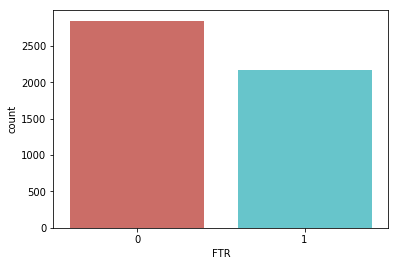

In [15]:
sns.countplot(x='FTR', data=df_final , palette = "hls")
plt.show()

In [16]:
count_no_home = len(df_final[df_final['FTR']==0])
count_home = len(df_final[df_final['FTR']==1])
pct_of_no_home = count_no_home/(count_home+count_no_home)
print("Percentage of no home win is", count_no_home*100)
pct_of_home = count_home/(count_home+count_no_home)
print("Percentage of home win", pct_of_home*100)

Percentage of no home win is 285000
Percentage of home win 43.31742243436754


Zbiór daych składa się z 4040 obserwacji. 
Ponad 22% z nich to zdarzenia w których zmienna wynikowa, w naszym przypadku 'draw', przyjmuje wartośc 1, co oznacza wystapienie remisu.

In [17]:
warnings.simplefilter('ignore')
df_final.groupby('FTR').mean() 

,HTGD,ATGD,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffPts,DiffFormPts,DiffLP,Mean_home_goals,Mean_away_goals,H2H_Diff,ELO_diff,Total_Diff,LP_Diff
FTR,,,,,,,,,,,,,,,,,,,
0,-0.073749,0.071782,0.041404,0.006667,0.049474,0.008772,0.063158,0.018596,0.040702,0.005263,-2.337544,-0.770526,2.672281,1.438429,1.153913,-0.481053,-13.344912,1.279218,1.400702
1,0.070663,-0.072782,0.057851,0.011938,0.041781,0.005510,0.041322,0.003673,0.057392,0.008724,2.627640,0.671258,-3.490817,1.535204,1.144773,0.078512,17.365473,1.566553,-2.033058


Zgrupowany zbiór danych według zminnej 'draw' w poszukiwaniu ciekawych wniosków.
Większość zmiennych nie rózni się średnimi w danej kategorii.
Poza nimi interesująca jest m.in. Zmienna HTGD (róznica bramek strzelonych i straconych drużyny gospodarzy w sezonie), która przyjmuje mniejszą wartość średniej dla grupy z draw = 1, aniżeli dla grupy z draw = 0.

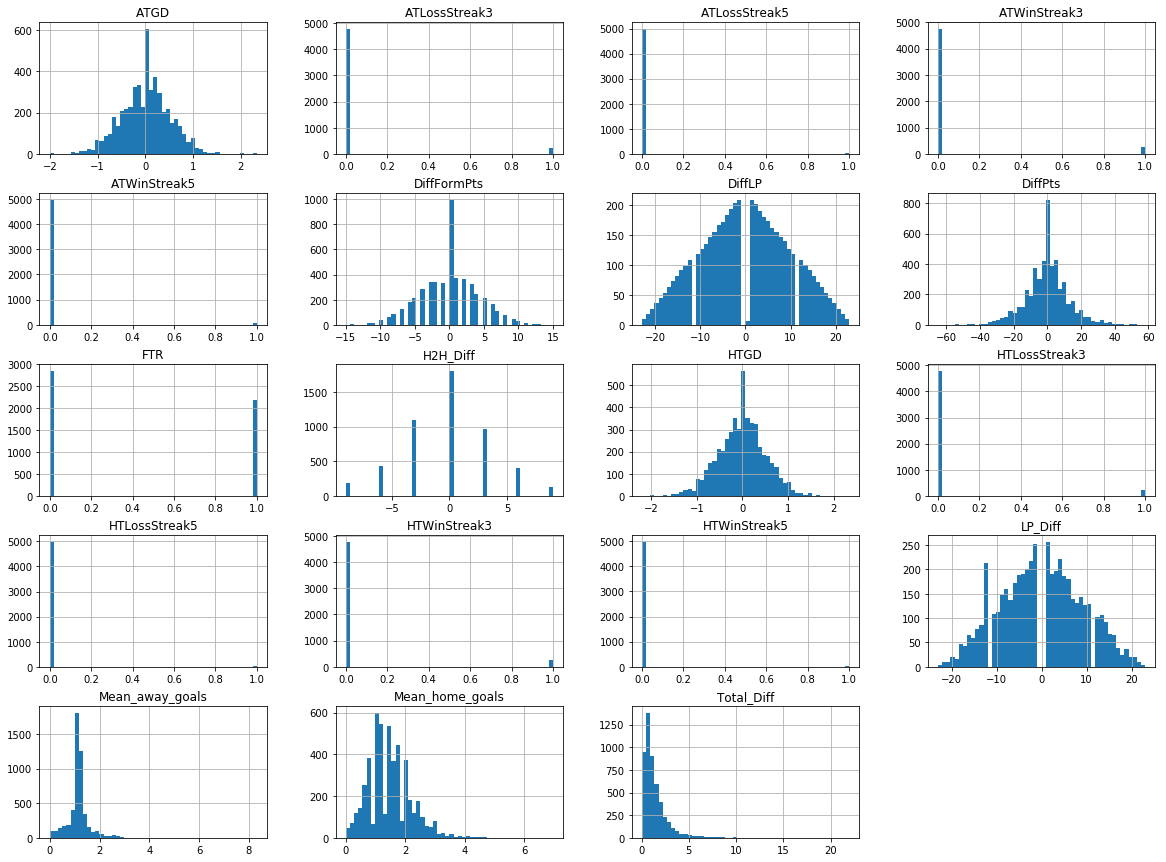

In [18]:
cols_to_plot = [  'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3',
       'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3',
       'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffLP',
          'Mean_home_goals', 'Mean_away_goals',      'H2H_Diff',   'Total_Diff',  'LP_Diff', 'FTR']
df_final[cols_to_plot].hist(bins=50, figsize=(20,15))
plt.show()

# Korelacja zmiennych

In [19]:
df_final["Goals_mean_diff"] = df_final["Mean_home_goals"] - df_final["Mean_away_goals"]
cols_selected = [
       'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',
       'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts', 'DiffFormPts', 'DiffLP',  'Mean_home_goals',
       'Mean_away_goals', 'H2H_Diff',     'Total_Diff',  'LP_Diff', 'FTR',       'Goals_mean_diff']

corr_matrix = df_final[cols_selected].corr()
corr_matrix[(corr_matrix>0.8) | (corr_matrix< -0.8) ]

,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffPts,DiffFormPts,DiffLP,Mean_home_goals,Mean_away_goals,H2H_Diff,Total_Diff,LP_Diff,FTR,Goals_mean_diff
HTWinStreak3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HTWinStreak5,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HTLossStreak3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HTLossStreak5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATWinStreak3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATWinStreak5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATLossStreak3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATLossStreak5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DiffPts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.837235,NaN,NaN
DiffFormPts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Usuniecie wysoce skorelowanych zmiennych ze soba

In [20]:
cols_selected = ['HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',
       'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts', 'DiffFormPts', 'DiffLP',
      'H2H_Diff',
         'Total_Diff', 'LP_Diff', 'FTR',
       'Goals_mean_diff']
corr_matrix = df_final[cols_selected].corr()
corr_matrix[(corr_matrix>0.85) | (corr_matrix< -0.85) ]

,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffPts,DiffFormPts,DiffLP,H2H_Diff,Total_Diff,LP_Diff,FTR,Goals_mean_diff
HTWinStreak3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HTWinStreak5,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HTLossStreak3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HTLossStreak5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATWinStreak3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATWinStreak5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATLossStreak3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATLossStreak5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DiffPts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DiffFormPts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


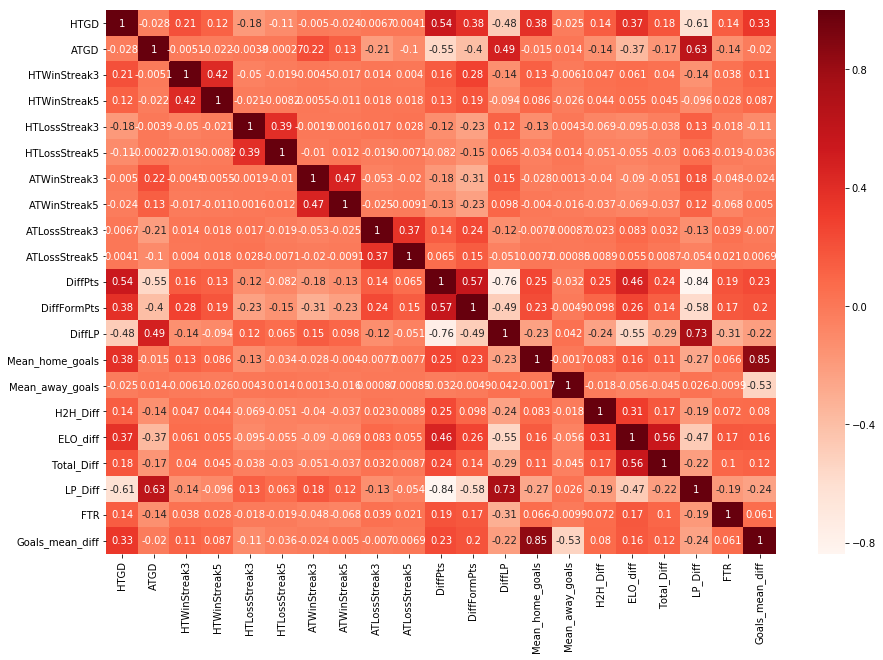

FTR    1.0
Name: FTR, dtype: float64

In [21]:
plt.figure(figsize=(15,10))
cor = df_final.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#Selecting highly correlated features#Correlation with output variable
cor_target = abs(cor["FTR"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features


In [22]:
df_final = df_final.drop('Mean_home_goals',axis=1)

Nie ma tu takich więc nie ma potrzeby wyrzucania odpowiednich zmiennych

### Finalny zbiór danych

In [23]:
df_final.tail()

,HTGD,ATGD,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffPts,DiffFormPts,DiffLP,Mean_away_goals,H2H_Diff,ELO_diff,Total_Diff,LP_Diff,FTR,Goals_mean_diff
Date,,,,,,,,,,,,,,,,,,,,
2019-12-03,0.729730,0.297297,1,0,0,0,0,0,0,0,19,4.0,-9.0,1.507353,6,-53,1.154248,-10,1,0.492647
2019-12-03,-0.916667,-0.194444,0,0,0,0,0,0,0,0,-22,-6.0,11.0,0.332500,0,-114,0.379849,8,0,0.473952
2019-12-03,-0.351351,0.594595,0,0,0,0,0,0,0,0,-34,-2.0,17.0,0.482353,0,-137,0.832753,15,0,1.117647
2019-12-03,0.189189,-0.864865,0,0,0,0,0,0,0,0,33,-2.0,-16.0,2.364475,9,75,1.890080,-14,0,-1.166614
2019-12-03,-0.222222,-0.416667,0,0,1,0,0,0,0,0,8,-3.0,-3.0,1.108333,-3,-9,0.869981,-2,1,0.058333


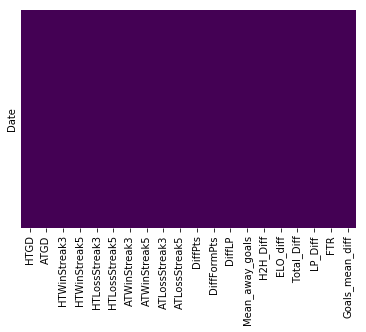

In [24]:
sns.heatmap(df_final.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
#X = df_final.loc[:, df_final.columns != 'draw']
#y = df_final.loc[:, df_final.columns == 'draw']

In [26]:
#from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(X)
#X = pd.DataFrame(x_scaled)
#X.columns = df_final.drop('FTR',axis=1).values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final.drop('FTR',axis=1).reset_index(drop = True), 
           df_final['FTR'].reset_index().drop('Date',axis=1), test_size=0.30, 
            random_state=101)

In [28]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x.reset_index(drop = True), 
#          df_final['FTR'].drop('Date',axis=1), test_size=0.30, 
#            random_state=101)

Here y is the actual data which we are going to predict, everything else is going to be the features(x).
Set the text size to 30 percent and you don’t actually have to set your random state but this is put so if you want your result to match mines exactly.
We will use train_test_split from the cross_validation module to split our data. 70%of the data will be training data and %30 will be testing data.
You can read more about Train_Test_Split

In [29]:
X_train.tail()

,HTGD,ATGD,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffPts,DiffFormPts,DiffLP,Mean_away_goals,H2H_Diff,ELO_diff,Total_Diff,LP_Diff,Goals_mean_diff
4171,0.192308,0.307692,0,0,0,0,0,0,0,0,2,2.0,2.0,1.229314,-3,-61,0.122951,-1,-0.475124
599,1.500000,0.500000,0,0,0,0,0,0,0,0,4,0.0,-14.0,1.391667,0,-23,1.545075,-7,1.608333
1361,-0.318182,0.681818,0,0,0,0,0,0,0,0,-17,-4.0,7.0,1.375000,0,148,1.208706,17,0.375000
1547,-0.277778,0.111111,0,0,0,0,0,0,0,0,-4,1.0,-3.0,1.133333,3,57,3.664407,4,0.366667
4959,1.200000,-0.800000,0,0,0,0,0,0,0,0,3,0.0,-7.0,1.500000,0,83,1.344733,-8,1.000000


In [30]:
y_train.tail()

,FTR
4171,0
599,1
1361,0
1547,0
4959,1


# Wybór zmiennych

https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

[0.08371832 0.08379527 0.00750384 0.00249498 0.01012222 0.00204737
 0.00796445 0.00342148 0.00856538 0.00197439 0.08326852 0.08361268
 0.12460697 0.08533251 0.06442679 0.08614833 0.09015967 0.08615094
 0.08468588]


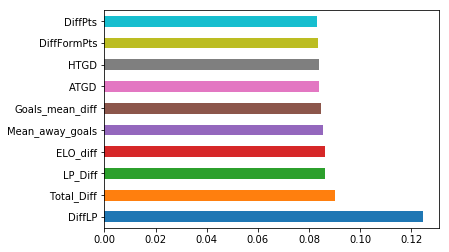

In [31]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = X_train #independent columns
y = y_train  #target column i.e price range
#apply SelectKBest class to extract top 10 best features
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [32]:
veriables = list(feat_importances.nlargest(10).index)

# Implementacja modelu regresji logistycznej

In [36]:
X_train[veriables].head()

,DiffLP,Total_Diff,LP_Diff,ELO_diff,Mean_away_goals,Goals_mean_diff,ATGD,HTGD,DiffFormPts,DiffPts
162,2.0,0.629436,3,-35,1.091667,0.708333,1.750000,0.250000,-1.0,-8
3081,-5.0,1.142857,-5,105,1.025000,0.475000,-0.785714,-0.178571,-1.0,8
2312,-3.0,1.072832,-23,20,1.241667,0.558333,-1.428571,1.142857,10.0,13
2234,-5.0,1.886175,12,80,1.450000,0.533403,1.000000,-0.500000,0.0,-3
1621,-13.0,3.343284,-13,98,0.813333,1.986667,-0.363636,0.090909,-3.0,13


In [37]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train[veriables])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.637016
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.073     
Dependent Variable: FTR              AIC:              4503.3191 
Date:               2019-08-29 09:22 BIC:              4564.9784 
No. Observations:   3519             Log-Likelihood:   -2241.7   
Df Model:           9                LL-Null:          -2419.0   
Df Residuals:       3509             LLR p-value:      6.5526e-71
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
DiffLP           -0.0863   0.0065 -13.3189 0.0000 -0.0990 -0.0736
Total_Diff       -0.0269   0.0286  -0.9404 0.3470 -0.0828  0.0291


Na podstawie p-value (kolumna P>|z|) najeży wybrać zmienne które są istotne statystycznie.
W naszym przypadku poziom ufnoścu przyjeliśmy równy 5% czyli wsystkie zmienne z p-value powyżej 0.05 należy odrzucić z modelu.

In [38]:
cols_to_df = ["DiffLP", "DiffFormPts", "LP_Diff", "DiffPts", "Mean_away_goals"]


logit_model2=sm.Logit(y_train,X_train[cols_to_df])
result2=logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.637875
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.072     
Dependent Variable: FTR              AIC:              4499.3618 
Date:               2019-08-29 09:22 BIC:              4530.1914 
No. Observations:   3519             Log-Likelihood:   -2244.7   
Df Model:           4                LL-Null:          -2419.0   
Df Residuals:       3514             LLR p-value:      3.6216e-74
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
DiffLP           -0.0856   0.0062 -13.8062 0.0000 -0.0977 -0.0734
DiffFormPts       0.0414   0.0107   3.8696 0.0001  0.0204  0.0624


## Cross walidacja

In [39]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_model.LogisticRegression(), X, y,
scoring='accuracy', cv=8)
print(scores)
print(scores.mean())

[0.64172336 0.59863946 0.62811791 0.6        0.65148064 0.62642369
 0.65375854 0.66059226]
0.6325919813635401


## Weryfikacja modelu 

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train[veriables], y_train)

y_pred = logreg.predict(X_test[veriables])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test[veriables], y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.64
[[429 162]
 [214 251]]


In [ ]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test[veriables]))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test[veriables])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       591
           1       0.61      0.54      0.57       465

   micro avg       0.64      0.64      0.64      1056
   macro avg       0.64      0.63      0.63      1056
weighted avg       0.64      0.64      0.64      1056



Compute precision, recall, F-measure and support
To quote from Scikit Learn:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

# Nowe dane

In [44]:
predict = pd.read_csv(loc +"predict_"+league_abb+".csv", index_col = 0)


cols_sel= ['HomeTeam', 'AwayTeam', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP',
       'ATP', 'HT_Wins', 'AT_Wins', 'HT_Loss', 'AT_Loss', 'HT_Draws',
       'AT_Draws', 'MW', 'HomeTeamLP', 'AwayTeamLP', 'Sezon', 'HT_LP', 'AT_LP',
       'HTFormPts', 'ATFormPts', 'HTWinStreak5', 'HTWinStreak3',
       'HTLossStreak3', 'HTLossStreak5', 'HTDrawStreak3',
       'HTDrawStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3',
       'ATLossStreak5', 'ATDrawStreak3', 'ATDrawStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts', 'DiffLP', 'H2H_Home_pts', 'H2H_Away_pts',
        'Mean_home_goals', 'Mean_away_goals',
       'Elo_HT', 'Elo_AT',  'Age_H', 'Foreign_H', 'Total_value_H',
       'Market_value_H',  'Age_A', 'Foreign_A', 'Total_value_A',
       'Market_value_A']

predict = predict[cols_sel]

predict.HTFormPts = predict.HTFormPts.fillna(predict.HTFormPts.median())
predict.ATFormPts = predict.ATFormPts.fillna(predict.ATFormPts.median())
predict.DiffFormPts = predict.DiffFormPts.fillna(predict.DiffFormPts.median())

predict["H2H_Diff"] = predict["H2H_Home_pts"] - predict["H2H_Away_pts"]
predict["Total_Diff"] = predict["Total_value_H"] / predict["Total_value_A"]
predict["Age_diff"] = predict["Age_H"] - predict["Age_A"]
predict["LP_Diff"] = predict["HT_LP"] - predict["AT_LP"]
predict["ELO_diff"] = predict["Elo_HT"] - predict["Elo_AT"]

predict = predict[['HomeTeam', 'AwayTeam', 'HTGD', 'ATGD',
          'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3',
       'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3',
       'ATLossStreak5',  'DiffPts', 'DiffFormPts', 'DiffLP',
        'Mean_home_goals', 'Mean_away_goals',  'H2H_Diff', "ELO_diff", 
        'Total_Diff', 'LP_Diff', 'FTR']]

predict["Goals_mean_diff"] = predict["Mean_home_goals"] - predict["Mean_away_goals"]

predict = predict.drop('Mean_home_goals',axis=1)



In [45]:
predict.tail()

,HomeTeam,AwayTeam,HTGD,ATGD,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffPts,DiffFormPts,DiffLP,Mean_away_goals,H2H_Diff,ELO_diff,Total_Diff,LP_Diff,FTR,Goals_mean_diff
Date,,,,,,,,,,,,,,,,,,,,,,
2019-08-31,Luton,Huddersfield,-0.166667,-0.666667,0,0,0,0,0,0,0,0,3,3.0,0.0,1.125000,0,-65,0.181916,-5,NaN,0.875000
2019-08-31,Birmingham,Stoke,-0.666667,-1.166667,0,0,0,0,0,0,0,0,6,6.0,1.0,1.125000,6,17,0.311727,-9,NaN,0.375000
2019-08-31,Wigan,Barnsley,-1.333333,-1.000000,0,0,0,0,0,0,0,0,-1,-1.0,0.0,1.007463,6,31,2.396532,1,NaN,0.607922
2019-08-31,Bristol City,Middlesbrough,0.833333,-0.166667,0,0,0,0,0,0,0,0,5,5.0,1.0,1.125000,-3,26,0.962153,-13,NaN,-0.125000
2019-08-31,Reading,Charlton,0.666667,0.500000,0,0,0,0,0,0,0,0,-4,-4.0,2.0,1.511194,3,26,3.492754,8,NaN,-0.311194


In [46]:
predict = predict.reset_index().drop('Date', axis = 1)

In [47]:
y_pred_new = logreg.predict(predict[veriables])

In [48]:
y_pred_new

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [51]:
final_logreg = pd.concat([predict[["HomeTeam", "AwayTeam"]].reset_index(drop=True), pd.DataFrame(y_pred_new)], axis=1)

In [52]:
final_logreg

,HomeTeam,AwayTeam,0
0,Cardiff,Fulham,0
1,Leeds,Swansea,1
2,Brentford,Derby,0
3,Nott'm Forest,Preston,1
4,Millwall,Hull,0
5,West Brom,Blackburn,1
6,Sheffield Weds,QPR,1
7,Luton,Huddersfield,0
8,Birmingham,Stoke,0
9,Wigan,Barnsley,0


In [53]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [54]:
# Create Decision Tree classifer object
clf =  DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train[veriables], y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test[veriables])

In [55]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6212121212121212


In [56]:
y_pred_new = clf.predict(predict[veriables])

In [57]:
final_DT = pd.concat([predict[["HomeTeam", "AwayTeam"]].reset_index(drop=True), pd.DataFrame(y_pred_new)], axis=1)

In [58]:
final_DT

,HomeTeam,AwayTeam,0
0,Cardiff,Fulham,0
1,Leeds,Swansea,0
2,Brentford,Derby,0
3,Nott'm Forest,Preston,0
4,Millwall,Hull,0
5,West Brom,Blackburn,1
6,Sheffield Weds,QPR,0
7,Luton,Huddersfield,0
8,Birmingham,Stoke,0
9,Wigan,Barnsley,0


In [59]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [60]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.634469696969697


In [61]:
y_pred_new = clf.predict(predict[list(X_train.columns)])

In [64]:
final_RF = pd.concat([predict[["HomeTeam", "AwayTeam"]].reset_index(drop=True), pd.DataFrame(y_pred_new)], axis=1)

In [65]:
final_RF

,HomeTeam,AwayTeam,0
0,Cardiff,Fulham,0
1,Leeds,Swansea,0
2,Brentford,Derby,0
3,Nott'm Forest,Preston,0
4,Millwall,Hull,0
5,West Brom,Blackburn,0
6,Sheffield Weds,QPR,0
7,Luton,Huddersfield,0
8,Birmingham,Stoke,0
9,Wigan,Barnsley,1


In [66]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

DiffLP             0.123979
Total_Diff         0.103892
ELO_diff           0.102053
Goals_mean_diff    0.098745
ATGD               0.094288
Mean_away_goals    0.093859
HTGD               0.091983
DiffPts            0.082909
LP_Diff            0.074979
DiffFormPts        0.067757
H2H_Diff           0.040990
HTLossStreak3      0.006116
ATWinStreak3       0.005115
HTWinStreak3       0.004762
ATLossStreak3      0.003883
ATWinStreak5       0.001751
HTLossStreak5      0.001025
HTWinStreak5       0.000990
ATLossStreak5      0.000924
dtype: float64

No handles with labels found to put in legend.


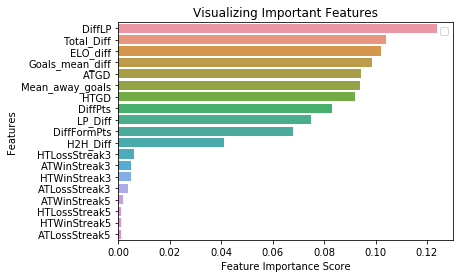

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [68]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into features and labels
X=df_final[['DiffLP', 'Total_Diff','ELO_diff', 'Goals_mean_diff', 'ATGD', 'Mean_away_goals', 
            'HTGD', 'DiffPts', 'LP_Diff', 'DiffFormPts']]  
y=df_final['FTR']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) #

In [69]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6099431818181819


In [71]:
y_pred_new = clf.predict(predict[list(X_train.columns)])
final_RF2 = pd.concat([predict[["HomeTeam", "AwayTeam"]].reset_index(drop=True), pd.DataFrame(y_pred_new)], axis=1)
final_RF2

,HomeTeam,AwayTeam,0
0,Cardiff,Fulham,0
1,Leeds,Swansea,1
2,Brentford,Derby,0
3,Nott'm Forest,Preston,1
4,Millwall,Hull,0
5,West Brom,Blackburn,1
6,Sheffield Weds,QPR,0
7,Luton,Huddersfield,1
8,Birmingham,Stoke,0
9,Wigan,Barnsley,0


# SVM

In [79]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)  

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6196022727272728


In [77]:
y_pred_new = clf.predict(predict[list(X_train.columns)])
final_SVM = pd.concat([predict[["HomeTeam", "AwayTeam"]].reset_index(drop=True), pd.DataFrame(y_pred_new)], axis=1)
final_SVM

,HomeTeam,AwayTeam,0
0,Cardiff,Fulham,0
1,Leeds,Swansea,0
2,Brentford,Derby,0
3,Nott'm Forest,Preston,0
4,Millwall,Hull,0
5,West Brom,Blackburn,1
6,Sheffield Weds,QPR,1
7,Luton,Huddersfield,0
8,Birmingham,Stoke,0
9,Wigan,Barnsley,0


In [80]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)  

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6392045454545454


In [82]:
y_pred_new = clf.predict(predict[list(X_train.columns)])
final_SVM2 = pd.concat([predict[["HomeTeam", "AwayTeam"]].reset_index(drop=True), pd.DataFrame(y_pred_new)], axis=1)
final_SVM2

,HomeTeam,AwayTeam,0
0,Cardiff,Fulham,0
1,Leeds,Swansea,0
2,Brentford,Derby,0
3,Nott'm Forest,Preston,0
4,Millwall,Hull,0
5,West Brom,Blackburn,0
6,Sheffield Weds,QPR,0
7,Luton,Huddersfield,0
8,Birmingham,Stoke,0
9,Wigan,Barnsley,0


# Stochastic Gradient Descent (SGD)

Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.

SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

The advantages of Stochastic Gradient Descent are:

Efficiency.
Ease of implementation (lots of opportunities for code tuning).
The disadvantages of Stochastic Gradient Descent include:

SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
SGD is sensitive to feature scaling.

In [128]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="log", penalty="l2", max_iter=15)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=15,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [129]:
# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6292613636363636


In [130]:
y_pred_new = clf.predict(predict[list(X_train.columns)])
final_SGD = pd.concat([predict[["HomeTeam", "AwayTeam"]].reset_index(drop=True), pd.DataFrame(y_pred_new)], axis=1)
final_SGD

,HomeTeam,AwayTeam,0
0,Cardiff,Fulham,0
1,Leeds,Swansea,1
2,Brentford,Derby,0
3,Nott'm Forest,Preston,0
4,Millwall,Hull,0
5,West Brom,Blackburn,1
6,Sheffield Weds,QPR,1
7,Luton,Huddersfield,0
8,Birmingham,Stoke,0
9,Wigan,Barnsley,0


# Naive Bayes

In [133]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [134]:
# prediction on test set
y_pred=gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6099431818181819


In [135]:
y_pred_new = clf.predict(predict[list(X_train.columns)])
final_Naive = pd.concat([predict[["HomeTeam", "AwayTeam"]].reset_index(drop=True), pd.DataFrame(y_pred_new)], axis=1)
final_Naive

,HomeTeam,AwayTeam,0
0,Cardiff,Fulham,0
1,Leeds,Swansea,1
2,Brentford,Derby,0
3,Nott'm Forest,Preston,0
4,Millwall,Hull,0
5,West Brom,Blackburn,1
6,Sheffield Weds,QPR,1
7,Luton,Huddersfield,0
8,Birmingham,Stoke,0
9,Wigan,Barnsley,0


In [143]:
from sklearn.neighbors import KNeighborsClassifier


0.6008522727272727


In [144]:
for i in range(3,20):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train, y_train) 
    print(knn.score(X_test, y_test))   

0.5707386363636363
0.5838068181818182
0.5684659090909091
0.5849431818181818
0.5866477272727273
0.5838068181818182
0.584659090909091
0.5963068181818182
0.6011363636363637
0.6011363636363637
0.5988636363636364
0.6019886363636363
0.602840909090909
0.603125
0.6008522727272727
0.6008522727272727
0.5977272727272728


In [146]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train) 
print(knn.score(X_test, y_test))   

0.6011363636363637


In [147]:
y_pred_new = knn.predict(predict[list(X_train.columns)])
final_KNN = pd.concat([predict[["HomeTeam", "AwayTeam"]].reset_index(drop=True), pd.DataFrame(y_pred_new)], axis=1)
final_KNN

,HomeTeam,AwayTeam,0
0,Cardiff,Fulham,0
1,Leeds,Swansea,1
2,Brentford,Derby,0
3,Nott'm Forest,Preston,0
4,Millwall,Hull,0
5,West Brom,Blackburn,1
6,Sheffield Weds,QPR,1
7,Luton,Huddersfield,0
8,Birmingham,Stoke,0
9,Wigan,Barnsley,0


In [150]:
final = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(final_logreg, final_DT,  how='inner', left_on=['HomeTeam', 'AwayTeam'], 
                           right_on = ['HomeTeam', 'AwayTeam']), 
         final_RF,  how='inner', left_on=['HomeTeam', 'AwayTeam'], 
                           right_on = ['HomeTeam', 'AwayTeam']),
          final_SVM2,  how='inner', left_on=['HomeTeam', 'AwayTeam'], 
                           right_on = ['HomeTeam', 'AwayTeam']),
             final_SGD,  how='inner', left_on=['HomeTeam', 'AwayTeam'], 
                           right_on = ['HomeTeam', 'AwayTeam']),
             final_Naive,  how='inner', left_on=['HomeTeam', 'AwayTeam'], 
                           right_on = ['HomeTeam', 'AwayTeam']),
             final_KNN,  how='inner', left_on=['HomeTeam', 'AwayTeam'], 
                           right_on = ['HomeTeam', 'AwayTeam'])

final.columns = [['HomeTeam', 'AwayTeam', 'LR', 'DT', 'RF', 'SVM', 'SGD', 'Naive', 'KNN']]
final

,HomeTeam,AwayTeam,LR,DT,RF,SVM,SGD,Naive,KNN
0,Cardiff,Fulham,0,0,0,0,0,0,0
1,Leeds,Swansea,1,0,0,0,1,1,1
2,Brentford,Derby,0,0,0,0,0,0,0
3,Nott'm Forest,Preston,1,0,0,0,0,0,0
4,Millwall,Hull,0,0,0,0,0,0,0
5,West Brom,Blackburn,1,1,0,0,1,1,1
6,Sheffield Weds,QPR,1,0,0,0,1,1,1
7,Luton,Huddersfield,0,0,0,0,0,0,0
8,Birmingham,Stoke,0,0,0,0,0,0,0
9,Wigan,Barnsley,0,0,1,0,0,0,0
